In [1]:
import pandas as pd
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/auksisi_protothjema.csv", sep='t', encoding='utf-8', index=False)

In [4]:
df.head()

,Unnamed: 0,headline,url,date
0,0,\nΨηφίζεται στη Βουλή η νέα ενίσχυση Fuel Pass...,https://www.protothema.gr/economy/article/1259...,2022-06-30T14:56:00+03:00
1,1,"\n«Αφαίμαξη 3,8 δισ. των πολιτών και εμπαιγμό ...",https://www.protothema.gr/politics/article/125...,2022-06-28T16:44:36+03:00
2,2,\nΖητούν παράταση ζωής για βενζίνης - diesel Ι...,https://www.newsauto.gr/news/pente-chores-plin...,2022-06-28T14:47:40+03:00
3,3,\nΤο ρεύμα για τα φτωχά νοικοκυριά στη Σρι Λάν...,https://www.protothema.gr/world/article/125893...,2022-06-27T21:59:00+03:00
4,4,\nΣυνεδριάζει το Πολιτικό Συμβούλιο του ΠΑΣΟΚ ...,https://www.protothema.gr/politics/article/125...,2022-06-27T13:17:00+03:00


In [28]:
df['date'].replace ('T', '')

0      2022-06-30T14:56:00+03:00
1      2022-06-28T16:44:36+03:00
2      2022-06-28T14:47:40+03:00
3      2022-06-27T21:59:00+03:00
4      2022-06-27T13:17:00+03:00
                 ...            
155    2022-05-11T10:00:00+03:00
156    2022-05-10T09:10:00+03:00
157    2022-05-09T07:22:00+03:00
158    2022-05-06T11:17:00+03:00
159    2022-05-05T19:08:00+03:00
Name: date, Length: 160, dtype: object

In [33]:
 df['headline'].str.replace('\n', '')

0      Ψηφίζεται στη Βουλή η νέα ενίσχυση Fuel Pass -...
1      «Αφαίμαξη 38 δισ. των πολιτών και εμπαιγμό από...
2      Ζητούν παράταση ζωής για βενζίνης - diesel ΙΧ ...
3      Το ρεύμα για τα φτωχά νοικοκυριά στη Σρι Λάνκα...
4      Συνεδριάζει το Πολιτικό Συμβούλιο του ΠΑΣΟΚ - ...
                             ...                        
155               Οσονούπω η κορυφαία έκδοση του VW ID.3
156    «Φωτιά» η τιμή της αμόλυβδης ακόμα και πάνω απ...
157    Ελλάδα: Τι έρχεται μετά τη βόμβα απαγόρευσης τ...
158    Οι ΗΠΑ κλιμακώνουν την πίεση στον ΟΠΕΚ με νόμο...
159     Και τα ηλεκτρικά αυτοκίνητα δικαιούνται το Fu...
Name: headline, Length: 160, dtype: object

In [35]:
df.dtypes

Unnamed: 0     int64
headline      object
url           object
date          object
dtype: object

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

In [36]:
text = df['headline'].str.cat(sep = ' ').replace("amp", ' ')

In [42]:
list(STOPWORDS)[0:20]

["wouldn't",
 'once',
 "won't",
 'from',
 'about',
 'i',
 'more',
 'few',
 'down',
 'are',
 'me',
 'just',
 'otherwise',
 'ever',
 "haven't",
 'have',
 'above',
 'nor',
 'of',
 'themselves']

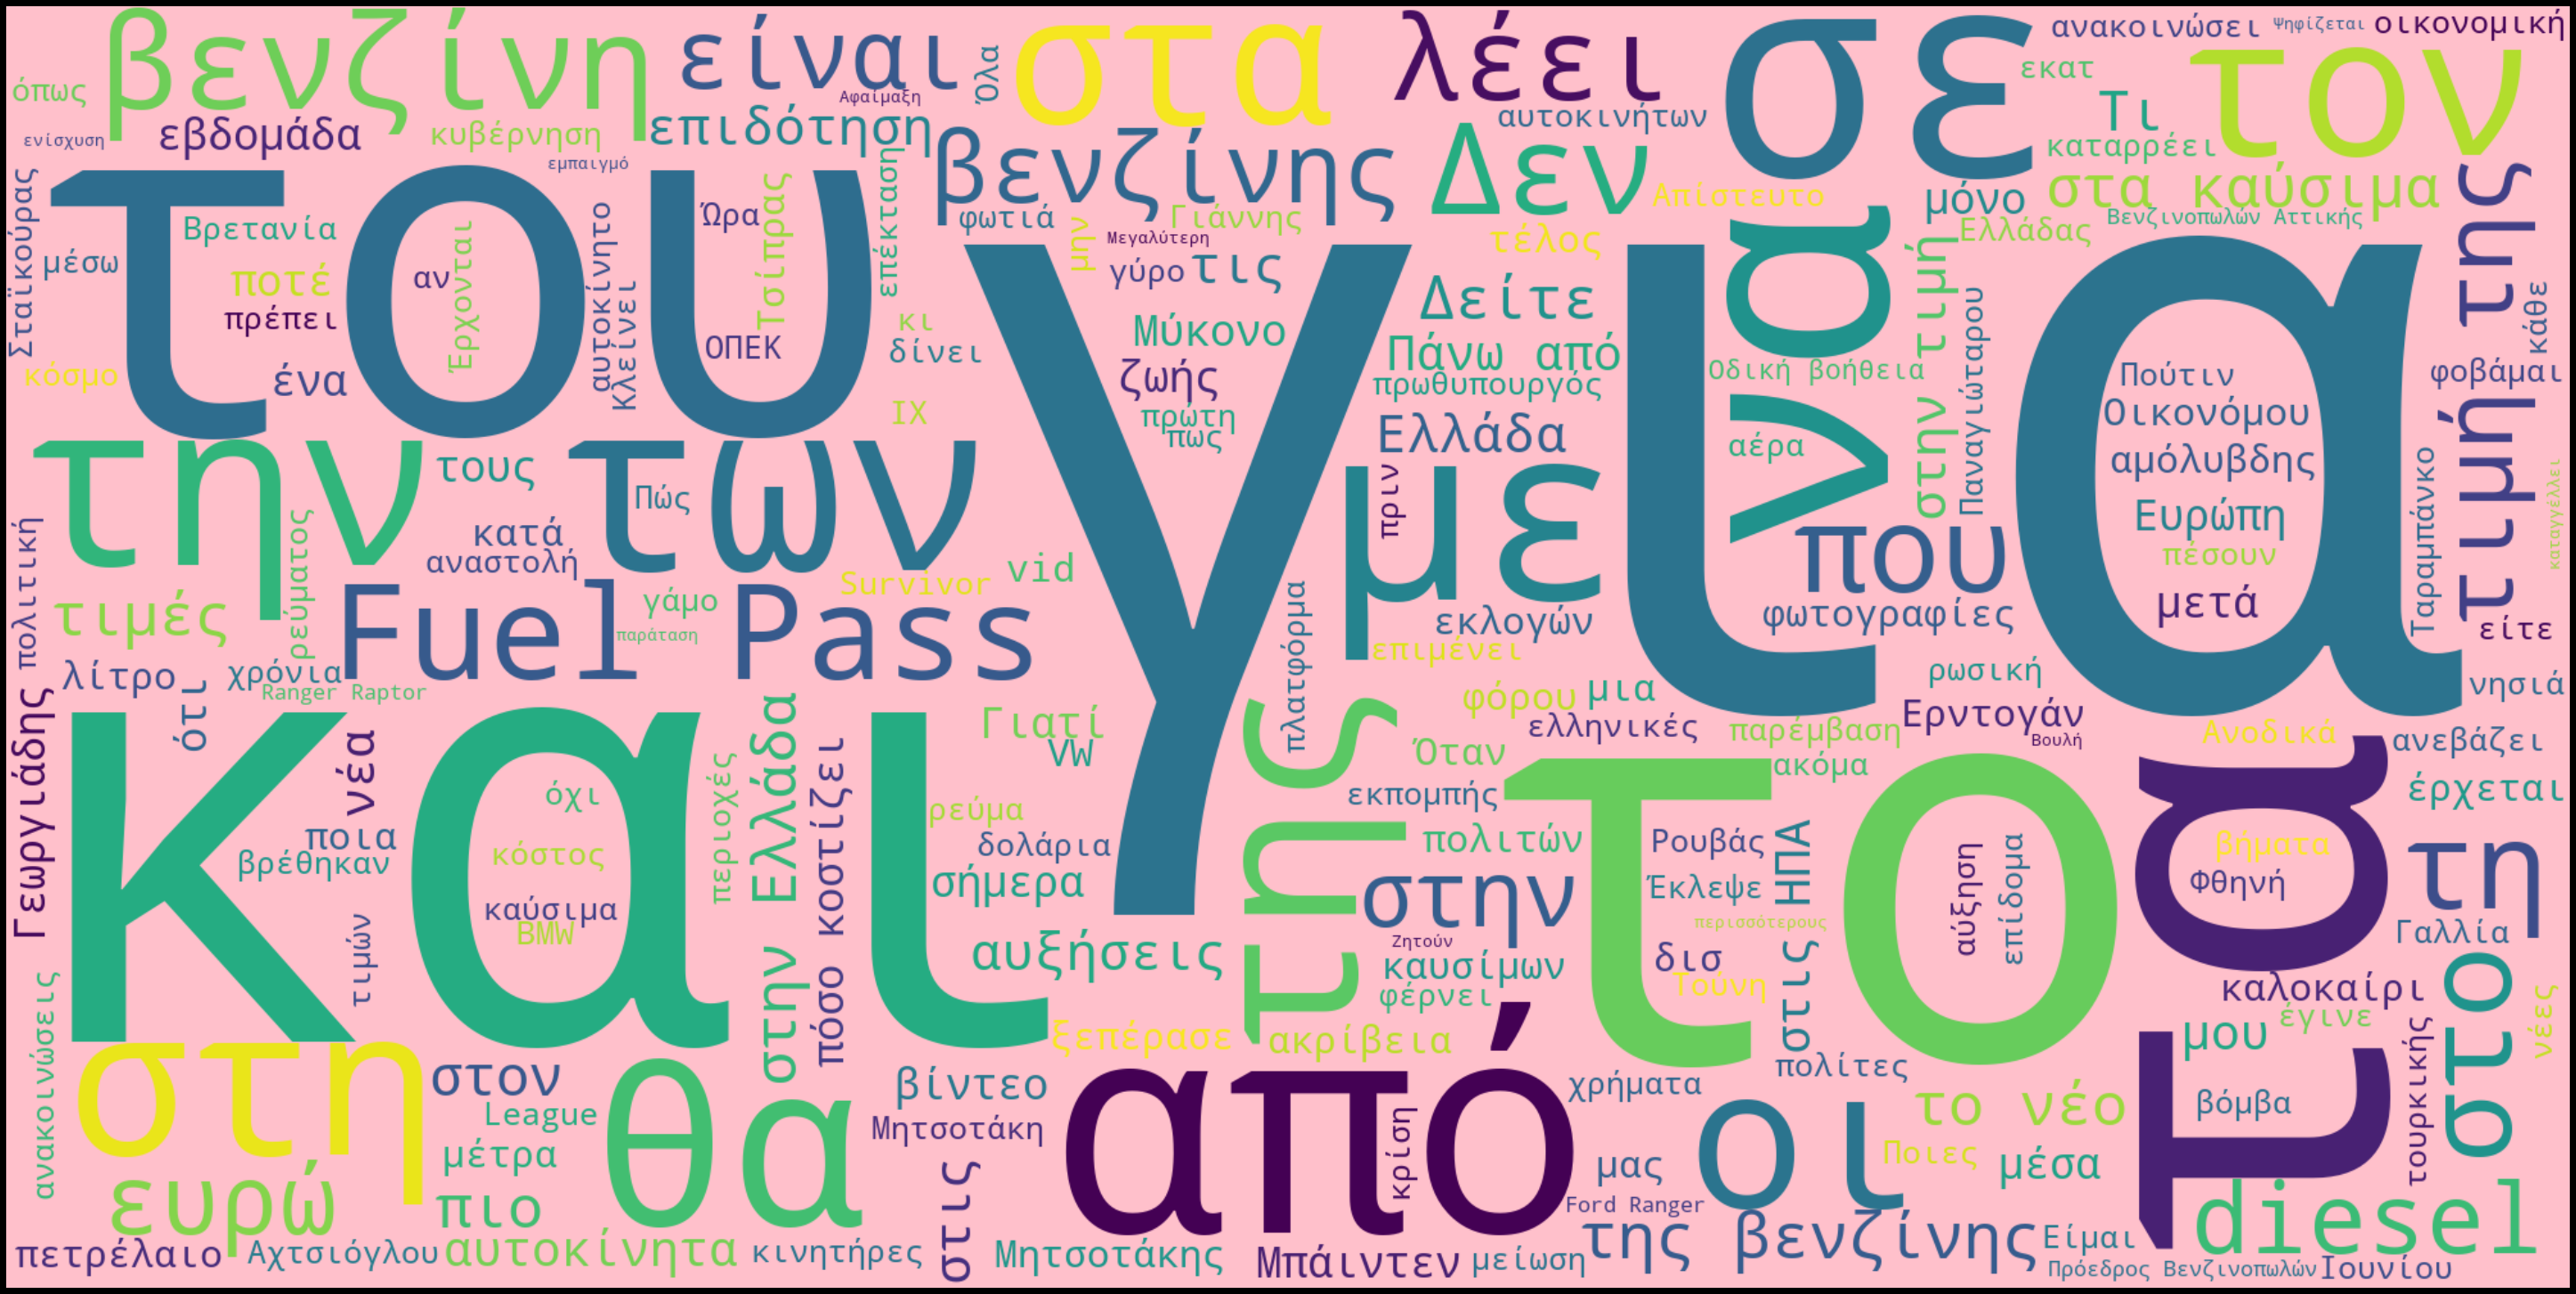

In [45]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'pink'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
import spacy

In [47]:
!python -m spacy download el_core_news_sm

# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 1.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [48]:
nlp = spacy.load('el_core_news_sm')

In [49]:
list(nlp.Defaults.stop_words)[0:20]

['εξίσου',
 'ήσουν',
 'δικού',
 'εν',
 'όσους',
 'ωστόσο',
 'ετούτον',
 'τόσοι',
 'συχνών',
 'άλλης',
 'ανωτέρω',
 'κανένα',
 'συν',
 'όσοι',
 'ετέρα',
 'ίσια',
 'σαν',
 'εκείνον',
 'τούτοις',
 'κάμποσου']

In [50]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'pink'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [51]:
doc = nlp(df['headline'][1])

In [52]:
for token in doc:
    print(token, token.lemma_)


 

« «
Αφαίμαξη Αφαίμαξη
38 38
δισ. δισ.
των ο
πολιτών πολίτης
και και
εμπαιγμό εμπαιγμό
από από
την ο
κυβέρνηση κυβέρνηση
» »
καταγγέλλει καταγγέλλω
η ο
Αχτσιόγλου Αχτσιόγλου

 



In [53]:
' '.join(token.lemma_ for token in doc)

'\n « Αφαίμαξη 38 δισ. ο πολίτης και εμπαιγμό από ο κυβέρνηση » καταγγέλλω ο Αχτσιόγλου \n'

In [54]:
text

'\nΨηφίζεται στη Βουλή η νέα ενίσχυση Fuel Pass - «Μεγαλύτερη και σε περισσότερους η επιδότηση» λέει ο Σταϊκούρας\n \n«Αφαίμαξη 38 δισ. των πολιτών και εμπαιγμό από την κυβέρνηση» καταγγέλλει η Αχτσιόγλου\n \nΖητούν παράταση ζωής για βενζίνης - diesel ΙΧ - Η Ελλάδα επιμένει στην... βόμβα\n \nΤο ρεύμα για τα φτωχά νοικοκυριά στη Σρι Λάνκα θα ακριβύνει κατά… 835%\n \nΣυνεδριάζει το Πολιτικό Συμβούλιο του ΠΑΣΟΚ - ΚΙΝΑΛ - Η  παρέμβαση Ανδρουλάκη\n \nΘα κρυώσει και θα πεινάσει τον χειμώνα η Ευρώπη;\n \nΑπίστευτο: Στις ΗΠΑ βάζουν «κουδούνι εξώπορτας» δίπλα στα ντεπόζιτα αυτοκινήτων για να μην τους κλέψουν τη βενζίνη (vid)\n \nΑνοδικά κινείται η κατανάλωση καυσίμων παρά την αύξηση των τιμών\n \nΘα σώσουν τα βενζίνης και diesel;\n \nΟδική βοήθεια: Πιο πολύτιμη από ποτέ!\n \nΜπάιντεν σε Ρεπουμπλικανούς: Θα προτιμούσατε χαμηλές τιμές στα καύσιμα και σιδηρά πυγμή του Πούτιν στην Ευρώπη;\n \nΕλλάδα: Βενζίνη με 19 diesel με 175 και υγραέριο με 045 ευρώ!\n \nΓερμανικό «ρήγμα» στο «stop» για τους κιν

In [55]:
full_doc = nlp(text)

In [56]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [57]:
clear_text[200:400]

'τούν παράταση ζωή για βενζίνη - diesel ΙΧ - ο Ελλάδα επιμένω σε ο ... βόμβα \n \n ο ρεύμα για ο φτωχά νοικοκυριά σε ο σρι Λάνκα θα ακριβύνω κατά … 835% \n \n Συνεδριάζει ο Πολιτικό συμβούλιο ο ΠΑΣΟΚ - ΚΙΝ'

In [65]:
wordcloud = WordCloud(
    stopwords = ['ταραμπάνκο','ξέρετε','Λάνκα','BMW','Γερμανικό', 'Survivor', 'ανοίγω', 'θεμος', 'κάνω', 'vid', 'League', 'βόμβα', 'σρι', 'Ροστρόφ', 'Ρουβάς', 'φέρνει', 'σιδηρά', 'Τούνη', 'VW']+ list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'pink'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
count_vector = cv.fit_transform(df['headline'])

In [68]:
count_vector.shape

(160, 928)

In [69]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,045,07,10,100,100μ,110,175,18,19,...,όμως,όπως,όρμπαν,όσα,όταν,ότι,όχι,ύση,ύψη,ώρα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [71]:
count_vector = cv.fit_transform(df['headline'])

In [72]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,110,2035,25,80,bmw,diesel,ford,fuel,...,τσίπρας,φέρνει,φθηνή,φοβάμαι,φωτιά,φωτογραφίες,φόρου,χρήματα,χρόνια,ώρα
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [74]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,...,100,110,2035,bmw,diesel,fordς,fuel,leagueς,pass,...,φοβάμαι,φωτιά,φωτογραφία,φόρο,φόρου,χάνω,χρήμα,χρόνος,χώρα,ώρα
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
 cv = CountVectorizer( stop_words = ['ταραμπάνκο','ξέρετε','Λάνκα','BMW','Γερμανικό', 'Survivor', 'ανοίγω', 'θεμος', 'κάνω', 'vid', 'League', 'βόμβα', 'σρι', 'Ροστρόφ', 'Ρουβάς', 'φέρνει', 'σιδηρά', 'Τούνη', 'VW']+ list(nlp.Defaults.stop_words), max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bmw', 'league', 'survivor', 'vw', 'γερμανικό', 'λάνκα', 'ροστρόφ', 'ρουβάς', 'τούνη'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,diesel,fuel,pass,αυξήσεις,αυτοκίνητα,βενζίνη,βενζίνης,δείτε,ελλάδα,επιδότηση,ευρώ,ηπα,καύσιμα,λέει,μύκονο,νέα,νέο,πόσο,τιμές,τιμή
0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
common_words=results.sum(axis=0)
common_words.sort_values(ascending=False).head(15)

βενζίνης     19
ελλάδα       14
τιμή         13
pass         13
βενζίνη      13
fuel         13
λέει         10
καύσιμα      10
diesel       10
ευρώ         10
νέο           9
δείτε         8
τιμές         8
επιδότηση     6
ηπα           6
dtype: int64

In [77]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,κυβέρνηση,κυκλάδες
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [78]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,diesel βενζίνης,ford ranger,fuel pass,ranger raptor,αέρα εκπομπής,βενζίνης diesel,δείτε βίντεο,δείτε πόσο,ερντογάν καταρρέει,ευρώ λίτρο,κοστίζει ελλάδα,νέες αυξήσεις,νέο fuel,οδική βοήθεια,πλατφόρμα fuel,πρόεδρος βενζινοπωλών,πόσο κοστίζει,τιμή αμόλυβδης,τιμή βενζίνης,φωτιά τιμή
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
results.sum(axis =0).sort_values(ascending = False)

fuel pass                13
τιμή βενζίνης             7
βενζίνης diesel           5
πόσο κοστίζει             4
diesel βενζίνης           3
νέο fuel                  3
τιμή αμόλυβδης            3
κοστίζει ελλάδα           3
δείτε πόσο                3
δείτε βίντεο              3
ερντογάν καταρρέει        2
ευρώ λίτρο                2
ford ranger               2
νέες αυξήσεις             2
οδική βοήθεια             2
πλατφόρμα fuel            2
πρόεδρος βενζινοπωλών     2
αέρα εκπομπής             2
ranger raptor             2
φωτιά τιμή                2
dtype: int64

In [80]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()  

fuel pass          13
τιμή βενζίνης       7
βενζίνης diesel     5
πόσο κοστίζει       4
diesel βενζίνης     3
dtype: int64

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
df3=df['headline']

In [91]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df3)  #finds the tfidf score with normalization

In [92]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,045,07,10,100,100μ,110,175,18,19,...,χωρισμό,χόλιγουντ,χώρα,χώρας,χώρες,ψηφίζεται,ψυχανάλυση,όρμπαν,ύση,ώρα
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.396475,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [93]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.24554574 0.
  0.15861365 0.09514879 0.28231296 0.         0.         0.15861365
  0.13789471 0.         0.11004037 0.         0.         0.
  0.         0.12494133 0.28954208 0.         0.         0.
  0.         0.         0.09659087 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07057464
  0.         0.         0.         0.         0.         0.06962607
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.08159809 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         

In [97]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.26875885]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.51972925 0.         0.        ]
 ...
 [0.         0.         0.51972925 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.26875885 0.         0.         ... 0.         0.         1.        ]]


In [98]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
arr

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.26875885],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.51972925, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.51972925, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26875885, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

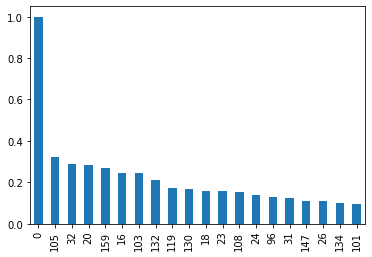

In [99]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [100]:
df['headline'].loc[0]

'\nΨηφίζεται στη Βουλή η νέα ενίσχυση Fuel Pass - «Μεγαλύτερη και σε περισσότερους η επιδότηση» λέει ο Σταϊκούρας\n'

In [102]:
df['headline'].loc[159]

'\n Και τα ηλεκτρικά αυτοκίνητα δικαιούνται το Fuel Pass\n'

In [103]:
df['url'].loc[0]

'https://www.protothema.gr/economy/article/1259997/fuel-pass-staikouras-megaluteri-kai-se-perissoterous-i-enishusi-tropologia-sti-vouli/'

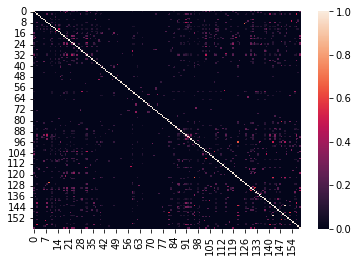

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(arr)